## II. Model creation and Algorithm Testing

In this notebook, I shall used prepared data from the previous notebook to create and train a model.

To create the model, I shall check for collinearity (and remove redundant columns) and apply Smote to deal with data imbalance (on the label). 

The model will be trained using the following algorithms: 
    * Linear Regression (l1 penalty)
    * Linear Regression (l2 penalty)
    * Linear Discriminant Analysis 
    * Gaussian Naive Bayes
    * Decision Tree Classifier
    * Random Forest Classifier
    * SVM classifier
    * KNN classifier

First, the algorithms will be tested without tunning its parameters

Secondly, I will find the best paramaters for some of the above algorithms and re-train the model to see if there was an improvement. 

Then, I will compare resulst and select the best one.

Conclusion and cross validation

### 1 Importing libraries

In [1]:
# import libraries
import pandas as pd
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import math
from glob import glob


%matplotlib inline
%matplotlib inline

### 2. Import datasets 

In [2]:
# Merge the two datasets
df=pd.read_csv('dfprepared.csv')
df.shape

(937, 36)

### 3. Model creation, data balancing and collinearity

#### 3.1 Model Creation

In [3]:
# create the model
X = df.loc[:, df.columns != 'CreditStatus']
y = df['CreditStatus']


In [4]:
from sklearn.model_selection import train_test_split
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#### 3.3 Smote for data imbalance

In [5]:
train_input = X_train
train_output = y_train

In [6]:
from imblearn.over_sampling import SMOTE
from collections import Counter
print('Original dataset shape {}'.format(Counter(train_output)))
smt = SMOTE(random_state=20)
train_input_new, train_output_new = smt.fit_sample(train_input, train_output)
print('New dataset shape {}'.format(Counter(train_output_new)))

Original dataset shape Counter({1: 358, 0: 297})
New dataset shape Counter({0: 358, 1: 358})


/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


#### 3.2 Checking for collinearity and feature removal

In [7]:
#Colinearity
import numpy as np
import pandas as pd
import time
from statsmodels.stats.outliers_influence import variance_inflation_factor    
from joblib import Parallel, delayed

# Defining the function that you will run later
def calculate_vif_(X_train, thresh=5.0):
    variables = [X_train.columns[i] for i in range(X_train.shape[1])]
    dropped=True
    while dropped:
        dropped=False
        print(len(variables))
        vif = Parallel(n_jobs=-1,verbose=5)(delayed(variance_inflation_factor)(X_train[variables].values, ix) for ix in range(len(variables)))

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print(time.ctime() + ' dropping \'' + X_train[variables].columns[maxloc] + '\' at index: ' + str(maxloc))
            variables.pop(maxloc)
            dropped=True

    print('Remaining variables:')
    print([variables])
    return X_train[[i for i in variables]]

X = X_train # Selecting your data

X_train = calculate_vif_(X_train,5) # Actually running the function

35


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  34 | elapsed:    0.1s remaining:    0.3s


Wed May 22 22:09:47 2019 dropping 'A11' at index: 5
34
Wed May 22 22:09:47 2019 dropping 'A30' at index: 8
33


[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  33 | elapsed:    0.1s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Wed May 22 22:09:48 2019 dropping 'A121' at index: 12
32
Wed May 22 22:09:48 2019 dropping 'A40' at index: 15
31


[Parallel(n_jobs=-1)]: Done   4 out of  32 | elapsed:    0.1s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  31 | elapsed:    0.1s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  29 | elapsed:    0.1s remaining:    0.4s


Wed May 22 22:09:48 2019 dropping 'A61' at index: 24
30
Wed May 22 22:09:48 2019 dropping 'A191' at index: 28
29
Wed May 22 22:09:48 2019 dropping 'A32' at index: 9
28
Remaining variables:
[['Age', 'Duration', 'InstallmentRatePecnt', 'NumberDependents', 'PresentResidenceTime', 'A12', 'A13', 'A14', 'A31', 'A33', 'A34', 'A122', 'A123', 'A124', 'A41', 'A410', 'A42', 'A43', 'A44', 'A45', 'A46', 'A48', 'A49', 'A62', 'A63', 'A64', 'A65', 'A192']]


[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  28 | elapsed:    0.1s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    0.1s finished


So the new data frame will be composed of the remaining variables above displayed

In [8]:
# So new data frame will be composed of columns above + label (CreditStatus)
df=df[['CreditStatus','Age', 'Duration', 'InstallmentRatePecnt', 'NumberDependents', 'PresentResidenceTime', 'A31', 'A33', 'A34', 'A122', 'A123', 'A124', 'A41', 'A410', 'A42', 'A43', 'A44', 'A45', 'A46', 'A48', 'A49', 'A62', 'A63', 'A64', 'A65', 'A192']]

In [9]:
df.shape

(937, 26)

### 5. Algorithm Testing 

#### 5.1 Baseline 
In this part, we shall train the model with several algorithms without tunning  algorithm hyperparameters

**Linear Regression classifier (l1) penalty**

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
X_train, X_dev, Y_train, Y_dev = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)
logreg = LogisticRegression(fit_intercept=True, penalty='l1')
print("Cross Validation Score: {:.2%}".format(np.mean(cross_val_score(logreg, X_train, Y_train, cv=10))))
logreg.fit(X_train, Y_train)
print("Dev Set score: {:.2%}".format(logreg.score(X_dev, Y_dev)))

logregprediction=logreg.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(logregprediction,y_test))

Cross Validation Score: 73.61%
Dev Set score: 74.31%
Accuracy: 0.7092198581560284


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

**Linear Regression classifier (l2) penalty**

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
X_train, X_dev, Y_train, Y_dev = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)
logreg2 = LogisticRegression(fit_intercept=True, penalty='l2')
print("Cross Validation Score: {:.2%}".format(np.mean(cross_val_score(logreg2, X_train, Y_train, cv=10))))
logreg2.fit(X_train, Y_train)
print("Dev Set score: {:.2%}".format(logreg2.score(X_dev, Y_dev)))

logreg2prediction=logreg2.predict(X_test)
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(logreg2prediction,y_test))

Cross Validation Score: 73.97%
Dev Set score: 73.61%
Accuracy: 0.7163120567375887


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

**Linear Discriminant Analysis** 

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
print("Cross Validation Score: {:.2%}".format(np.mean(cross_val_score(lda, X_train, Y_train, cv=10))))
lda.fit(X_train, Y_train)
print("Dev Set score: {:.2%}".format(lda.score(X_dev, Y_dev)))

lda_prediction=lda.predict(X_test)
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(lda_prediction,y_test))

Cross Validation Score: 73.09%
Dev Set score: 75.69%
Accuracy: 0.7269503546099291


/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.7/site-packages/sklearn

**Gaussian Naive Bayes** 

In [22]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
print("Cross Validation Score: {:.2%}".format(np.mean(cross_val_score(gnb, X_train, Y_train, cv=10))))
gnb.fit(X_train, Y_train)
print("Dev Set score: {:.2%}".format(gnb.score(X_dev, Y_dev)))

gnbprediction=logreg2.predict(X_test)
print("Accuracy:",metrics.accuracy_score(gnbprediction,y_test))

Cross Validation Score: 69.42%
Dev Set score: 68.75%
Accuracy: 0.7163120567375887


**Decision Tree Classifier**

In [10]:
#remember becaus of the new data after imbalance adjustment, we use the following
X_train, X_dev, Y_train, Y_dev = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)

#importing module
from sklearn.tree import DecisionTreeClassifier
#making the instance
dtc= DecisionTreeClassifier(random_state=1234)
#learning
dtc.fit(X_train,Y_train)
#Prediction
dtcprediction=dtc.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy of Decision Tree Classifier:",metrics.accuracy_score(dtcprediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Matrix:\n",metrics.confusion_matrix(dtcprediction,y_test))


Accuracy of Decision Tree Classifier: 0.6950354609929078
Confusion Matrix:
 [[ 83  47]
 [ 39 113]]


**Random Forest Classifier**

In [11]:
#remember becaus of the new data after imbalance adjustment, we use the following
X_train, X_dev, Y_train, Y_dev = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)

#importing module
from sklearn.ensemble import RandomForestClassifier
#making the instance
rfc=RandomForestClassifier(n_jobs=-1,random_state=123)
#learning
rfc.fit(X_train,Y_train)
#Prediction
rfcprediction=rfc.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy of Random Forest Classifier:",metrics.accuracy_score(rfcprediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Matrix:\n",metrics.confusion_matrix(rfcprediction,y_test))


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy of Random Forest Classifier: 0.7304964539007093
Confusion Matrix:
 [[ 97  51]
 [ 25 109]]


**SVM Classifier**

In [12]:
#remember becaus of the new data after imbalance adjustment, we use the following
X_train, X_dev, Y_train, Y_dev = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)

#importing module
from sklearn import svm
#making the instance
svc = svm.SVC(random_state=123)
#learning
svc.fit(X_train,Y_train)
#Prediction
svcprediction=svc.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy of SVM classifier:",metrics.accuracy_score(svcprediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Matrix:\n",metrics.confusion_matrix(svcprediction,y_test))


Accuracy of SVM classifier: 0.7056737588652482
Confusion Matrix:
 [[ 77  38]
 [ 45 122]]


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


**K-NearestNeighbours Classifier**

In [13]:
#remember becaus of the new data after imbalance adjustment, we use the following
X_train, X_dev, Y_train, Y_dev = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)

#importing module
from sklearn.neighbors import KNeighborsClassifier
#making the instance
knn = KNeighborsClassifier()
#learning
knn.fit(X_train,Y_train)
#Prediction
knnprediction=knn.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy of KNN classifier:",metrics.accuracy_score(knnprediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Matrix:\n",metrics.confusion_matrix(knnprediction,y_test))


Accuracy of KNN classifier: 0.6950354609929078
Confusion Matrix:
 [[ 84  48]
 [ 38 112]]


#### 5.2 Hyperparameter tunning
In this second part, I shall train the model with some of the above algorithms, but this time each algorithm will be trained with its best hyperparameters

**Decision Tree Classifier Hyperparameter tunned** 

In [14]:
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
#making the instance
dtcmodel= DecisionTreeClassifier(random_state=1234)
#Hyper Parameters Set
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
          'random_state':[123]}
#Making models with hyper parameters sets
model1 = GridSearchCV(dtcmodel, param_grid=params, n_jobs=-1)
#Learning
model1.fit(X_train,Y_train)
#The best hyper parameters set
print("Best Hyper Parameters:",model1.best_params_)
#Prediction
DTCimproved_prediction=model1.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy of DTC improved:",metrics.accuracy_score(DTCimproved_prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Matrix:\n",metrics.confusion_matrix(DTCimproved_prediction,y_test))



/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best Hyper Parameters: {'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 14, 'random_state': 123}
Accuracy of DTC improved: 0.6453900709219859
Confusion Matrix:
 [[83 61]
 [39 99]]


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


**Random Forest Classifier Hyperparameter tunned** 

In [15]:
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
#making the instance
rfcmodel=RandomForestClassifier()
#hyper parameters set
params = {'criterion':['gini','entropy'],
          'n_estimators':[10,15,20,25,30],
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6,7], 
          'random_state':[123],
          'n_jobs':[-1]}
#Making models with hyper parameters sets
model2 = GridSearchCV(rfcmodel, param_grid=params, n_jobs=-1)
#learning
model2.fit(X_train,Y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model2.best_params_)
#Prediction
RFCimproved_prediction=model2.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy of RFC improved:",metrics.accuracy_score(RFCimproved_prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Matrix:\n",metrics.confusion_matrix(RFCimproved_prediction,y_test))

from sklearn.model_selection import cross_val_score
print("Cross Validation Score: {:.2%}".format(np.mean(cross_val_score(model2, X_train, Y_train, cv=10))))

model2.fit(X_train, Y_train)
print("Dev Set score: {:.2%}".format(model2.score(X_dev, Y_dev)))



/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Hyper Parameters:
 {'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 30, 'n_jobs': -1, 'random_state': 123}
Accuracy of RFC improved: 0.8014184397163121
Confusion Matrix:
 [[ 95  29]
 [ 27 131]]


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-

Cross Validation Score: 76.56%


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Dev Set score: 77.08%


**SVM Classifier Hyperparameter tunned** 

In [26]:
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn import svm
#making the instance
svmmodel=svm.SVC()
#Hyper Parameters Set
params = {'C': [6,7,8,9,10,11,12], 
          'kernel': ['linear','rbf']}
#Making models with hyper parameters sets
model3 = GridSearchCV(svmmodel, param_grid=params, n_jobs=-1)
#Learning
model3.fit(X_train,Y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model3.best_params_)
#Prediction
SVMimproved_prediction=model3.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy SVMimproved:",metrics.accuracy_score(SVMimproved_prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Matrix:\n",metrics.confusion_matrix(SVMimproved_prediction,y_test))


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best Hyper Parameters:
 {'C': 6, 'kernel': 'rbf'}
Accuracy SVMimproved: 0.6702127659574468
Confusion Matrix:
 [[ 87  58]
 [ 35 102]]


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


**KNN Classifier Hyperparameter tunned** 

In [17]:
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
#making the instance
knnmodel = KNeighborsClassifier(n_jobs=-1)
#Hyper Parameters Set
params = {'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}
#Making models with hyper parameters sets
model4 = GridSearchCV(knnmodel, param_grid=params, n_jobs=1)
#Learning
model4.fit(X_train,Y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model4.best_params_)
#Prediction
KNNimproved_prediction=model4.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy of KNN classifier improved:",metrics.accuracy_score(KNNimproved_prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Matrix:\n",metrics.confusion_matrix(KNNimproved_prediction,y_test))


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best Hyper Parameters:
 {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 9, 'weights': 'distance'}
Accuracy of KNN classifier improved: 0.7553191489361702
Confusion Matrix:
 [[ 89  36]
 [ 33 124]]


In [27]:
### 6. Compare models (baseline vs tuned models)
print("Accuracy of Decision Tree Classifier:",metrics.accuracy_score(dtcprediction,y_test))
print("Accuracy of DTC improved:",metrics.accuracy_score(DTCimproved_prediction,y_test))

print("Accuracy of the Random Forest Classifier:",metrics.accuracy_score(rfcprediction,y_test))
print("Accuracy of RFC improved:",metrics.accuracy_score(RFCimproved_prediction,y_test))


print("Accuracy of SVM classifier:",metrics.accuracy_score(svcprediction,y_test))
print("Accuracy SVMimproved:",metrics.accuracy_score(SVMimproved_prediction,y_test))

print("Accuracy of KNN classifier:",metrics.accuracy_score(knnprediction,y_test))
print("Accuracy of KNN classifier improved:",metrics.accuracy_score(KNNimproved_prediction,y_test))







Accuracy of Decision Tree Classifier: 0.6950354609929078
Accuracy of DTC improved: 0.6453900709219859
Accuracy of the Random Forest Classifier: 0.7304964539007093
Accuracy of RFC improved: 0.8014184397163121
Accuracy of SVM classifier: 0.7056737588652482
Accuracy SVMimproved: 0.6702127659574468
Accuracy of KNN classifier: 0.6950354609929078
Accuracy of KNN classifier improved: 0.7553191489361702


We can see the accuracy of all models has been improved after tunning their hyperparameters, except for svm (probably given high deviation score). 

In [28]:
from sklearn.model_selection import cross_val_score
print("Cross Validation Score for SVM improved: {:.2%}".format(np.mean(cross_val_score(model3, X_train, Y_train, cv=10))))

model2.fit(X_train, Y_train)
print("Dev Set score SVM improved: {:.2%}".format(model3.score(X_dev, Y_dev)))

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in versi

Cross Validation Score for SVM improved: 73.76%


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Dev Set score SVM improved: 74.31%


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## 7. Conclusion and Cross Validation

Random Forest Classifier with its hyperparmaters tuned is the best model we obtained. 

These are the metric:

- Accuraccy 79.78% 
- Cross Validdation score 73.76 
- Dev set score of 74.31%. 

In [23]:
import sklearn.metrics as sklm

labels = np.array(df['CreditStatus'])
probabilities = model2.predict_proba(X_test)

def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])
scores = score_model(probabilities, 0.5)

def print_metrics(labels, scores):
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy  %0.2f' % sklm.accuracy_score(labels, scores))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])


    
print_metrics(y_test, scores)  

                 Confusion matrix
                 Score positive    Score negative
Actual positive        95                27
Actual negative        29               131

Accuracy  0.80
 
           Positive      Negative
Num case      122           160
Precision    0.77          0.83
Recall       0.78          0.82
F1           0.77          0.82


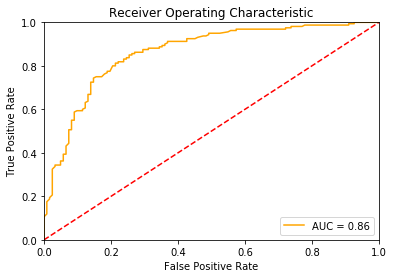

In [24]:
def plot_auc(labels, probs):
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC
    fpr, tpr, threshold = sklm.roc_curve(labels, probs[:,1])
    auc = sklm.auc(fpr, tpr)
    
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
plot_auc(y_test, probabilities)  